In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IsingSolutions import ising2d_exact, ising3d_monte_carlo as ising3d_mc
from TNModels import AKLT3D
from scipy.interpolate import interp1d,PchipInterpolator
from glob import glob
import numpy as np
import os
from tqdm.auto import tqdm
import json

In [11]:
def load_df(filenames):
    filenames=sorted(filenames,key=lambda x:os.path.getmtime(x))
    df=[]
    for filename in tqdm(filenames):
        data=json.load(open(filename,'r'))
        df.append(data['params'])
    print('loaded {} files'.format(len(df)))
    df=pd.DataFrame(df)
    return df
df=load_df(glob('./data/AKLT3D_X10_scan_grid_critical_a3/*/Tc.json'))
os.makedirs('./data_output/AKLT3D_X10_scan_grid_critical_a3/')
df.to_csv('./data_output/AKLT3D_X10_scan_grid_critical_a3/Tc.csv')
print('file saved to ./data_output/AKLT3D_X10_scan_grid_critical_a3/Tc.csv')

  0%|          | 0/113 [00:00<?, ?it/s]

loaded 113 files
file saved to ./data_output/AKLT3D_X10_scan_grid_critical_a3/Tc.csv


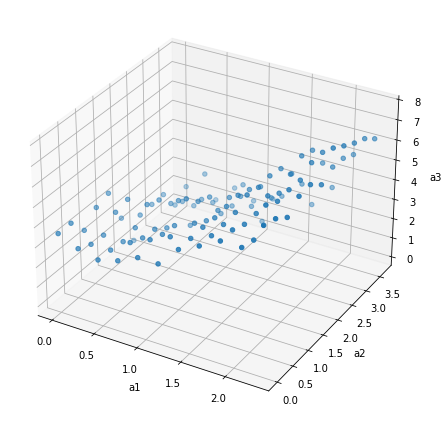

FileNotFoundError: [Errno 2] No such file or directory: './data_output/AKLT3D_X10_scan_grid_critical_a3/grid.png'

In [9]:
# plot3d
# a1 a2 a3
def grid_plot_3D(df,filename=None):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['a1'],df['a2'],df['a3'])
    ax.set_xlabel('a1')
    ax.set_ylabel('a2')
    ax.set_zlabel('a3')
    plt.tight_layout()
    plt.show()
    if filename is not None:
        fig.savefig(filename,bbox_inches='tight');print(f'saved to {filename}')

grid_plot_3D(df,'./data_output/AKLT3D_X10_scan_grid_critical_a3/grid.png')
